In [1]:
import numpy as np
import scipy
from scipy import special
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
%matplotlib notebook
plt.style.use('seaborn-pastel')

<IPython.core.display.Javascript object>


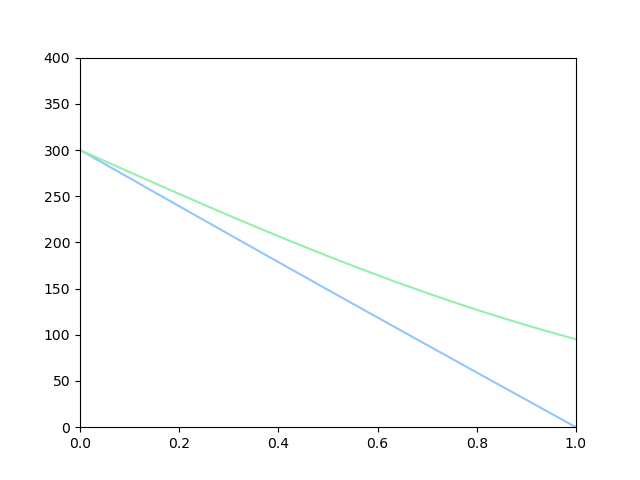

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99 1.  ]


In [63]:
#Схема 0 для линейного уравнения плюсом точное решение в виде функции ошибок
lambd = 0.1
Temp=300
L = 1
T = 5
C_p = 0.4
m = 100
h = L / m
t = C_p * h ** 2 / lambd
n = int(T // t)
x_i = np.arange(0, L+h, h) # значения в узлах по х
t_j = np.linspace(0, T, n) # значение в узлах по t
r_j = len(t_j) # количество узлов по t
r_i = len(x_i) # количество узлов по x
g_t_h = np.zeros([r_j, r_i]) # итоговая сетка размером t_j*x_i
#зададим граничные условия
def fi(x, Temp):
    ans = np.zeros(len(x))
    for i in range(len(x)):
        if x[i] == 0:
            ans[i] = Temp
        else: 
            ans[i] = 0
    return(ans)
T_t_0 = fi(x_i, Temp) # значение при t = 0
T_x_0 = Temp # значение при x = 0
T_x_L = 0
g_t_h[0] = T_t_0 # инициализация сетки t = 0
for i in range(n):
    g_t_h[i][0] = T_x_0 # граничное условие при х =0
for j in range(r_j - 1):#время
    for i in range(1, r_i - 1): #пространство
        g_t_h[j + 1][i] = C_p * g_t_h[j][i + 1] + (1 - 2 * C_p)*g_t_h[j][i] + C_p * g_t_h[j][i - 1]

fig = plt.figure()
ax = plt.axes(xlim=(0, 1), ylim=(0, 400))
line = []
N = 2
for j in range(N):
    temp, = plt.plot([], [])
    line.append(temp)
line = tuple(line)
def init():
    for j in range(N):
        line[j].set_data([], [])
    return line,
def animate(i):
    #x_i = np.arange(0, L, h)
    #y = g_t_h[i]
    x_i = np.arange(0, L+h, h)
    y1 = g_t_h[i]
    ksi = x_i / (2 * np.sqrt(lambd * i * t))
    y2 = Temp * special.erfc(ksi)
    line[0].set_data(x_i, y1)
    line[1].set_data(x_i, y2)
    return line,
 
anim = FuncAnimation(fig, animate, init_func=init,
                               frames=25000, interval=0.2, blit=True, repeat = False)
print(x_i)        
#зеленое-теоретическое, синее - численное        

<IPython.core.display.Javascript object>


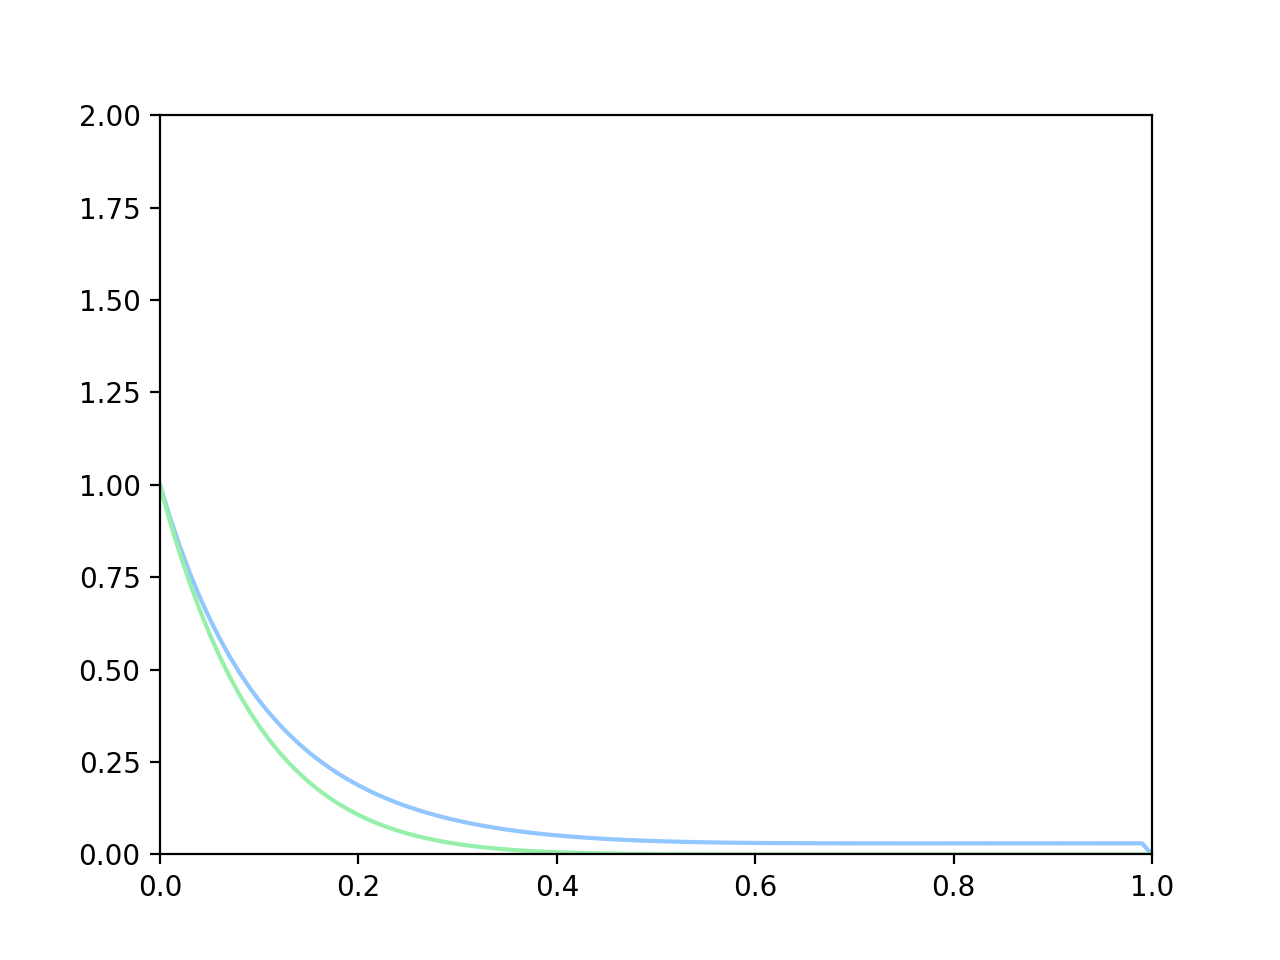

In [19]:
#решение для нелинейной задачи,численное и теоретическое
lambd_0 = 0.1
sigm = 0.1
Temp=1
L = 1
T = 1
C_p = 0.2
m = 100
h = L / m
t = C_p * h ** 2 / (lambd_0 * Temp**sigm)
n = int(T // t)
q = t / (h)**2
eps = 0.03
c = np.sqrt(Temp ** (sigm)*lambd_0 / sigm)
x_i = np.arange(0, L+h, h) # значения в узлах по х
t_j = np.linspace(0, T, n) # значение в узлах по t
r_j = len(t_j) # количество узлов по t
r_i = len(x_i) # количество узлов по x
g_t_h = np.zeros([r_j, r_i]) # итоговая сетка размером t_j*x_i
#граничные условия
g_t_h[0] = eps
for j in range(1, n):
    g_t_h[j][0] = Temp * (t_j[j]) ** (1/sigm)
    
for j in range(r_j - 1):#время
    for i in range(1, r_i - 1): #пространство
        lambd_i_1 = lambd_0 * (g_t_h[j][i - i])**sigm
        lambd_i = lambd_0 * (g_t_h[j][i])**sigm
        lambd_i1 = lambd_0 * (g_t_h[j][i+1])**sigm
        lambd_plus = 2 * (lambd_i * lambd_i1) / (lambd_i + lambd_i1)
        lambd_minus = 2 * (lambd_i*lambd_i_1) / (lambd_i + lambd_i_1)
        g_t_h[j+1][i] = (g_t_h[j][i] * (1 - q *(lambd_minus + lambd_plus)) + g_t_h[j][i+1] * q * lambd_plus + g_t_h[j][i-1] * lambd_minus*q)

def right_decision(x, t):
    ans = np.zeros(len(x))
    for i in range(len(x)):
        if x[i] <= c * t:
            ans[i] = (sigm * c * (c * t - x[i]) / lambd_0) ** (1 / sigm)
        else:
            ans[i] = 0
    return ans
fig = plt.figure()
ax = plt.axes(xlim=(0, 1), ylim=(0, 2))
line = []
N = 2
for j in range(N):
    temp, = plt.plot([], [])
    line.append(temp)
line = tuple(line)
def init():
    for j in range(N):
        line[j].set_data([], [])
    return line,
def animate(i):
    x_i = np.arange(0, L+h, h)
    y2 = right_decision(x_i, i * t)
    y1 = g_t_h[i]
    line[0].set_data(x_i, y1)
    line[1].set_data(x_i, y2)
    return line,
 
anim = FuncAnimation(fig, animate, init_func=init,
                               frames=n, interval=0.2, blit=True, repeat = False)     
#зеленое - теоретическое, синее - численное        

[[3.e+02 1.e-02 1.e-02 ... 1.e-02 1.e-02 0.e+00]
 [3.e+02 0.e+00 0.e+00 ... 0.e+00 0.e+00 0.e+00]
 [3.e+02 0.e+00 0.e+00 ... 0.e+00 0.e+00 0.e+00]
 ...
 [3.e+02 0.e+00 0.e+00 ... 0.e+00 0.e+00 0.e+00]
 [3.e+02 0.e+00 0.e+00 ... 0.e+00 0.e+00 0.e+00]
 [3.e+02 0.e+00 0.e+00 ... 0.e+00 0.e+00 0.e+00]]


<IPython.core.display.Javascript object>


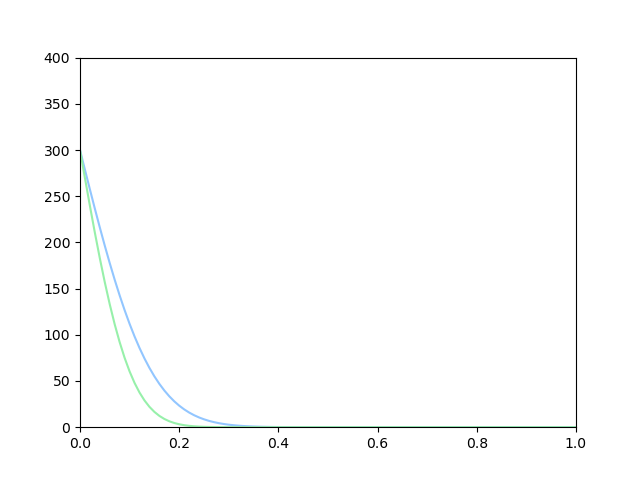

833


In [131]:
#схема 2 трехступенчатая для линейного уравнения прогонкой
lambd = 0.1
Temp=300
L = 1
T = 0.5
C_p = 0.6
m =100
h = L / m
t = C_p * h ** 2 / lambd
n = int(T // t)
x_i = np.arange(0, L+h, h) # значения в узлах по х
t_j = np.linspace(0, T, n) # значение в узлах по t
r_j = len(t_j) # количество узлов по t
r_i = len(x_i) # количество узлов по x
g_t_h = np.zeros([r_j, r_i]) # итоговая сетка размером t_j*x_i, просто температура, t
g1_t_h = np.zeros([r_j, r_i]) # т с волной t
g2_t_h = np.zeros([r_j, r_i]) # т с чертой t / 2
g3_t_h = np.zeros([r_j, r_i]) # т с крышкой t / 2
def fi(x, Temp):
    ans = np.zeros(len(x))
    for i in range(len(x)):
        if x[i] == 0:
            ans[i] = Temp
        else: 
            ans[i] = 0.01
    return(ans)
T_t_0 = fi(x_i, Temp) # значение при t = 0
T_x_0 = Temp # значение при x = 0
T_x_L = 0
g_t_h[0] = T_t_0 # инициализация сетки t = 0
g1_t_h[0] = T_t_0 # инициализация сетки t = 0
g2_t_h[0] = T_t_0 # инициализация сетки t = 0
g3_t_h[0] = T_t_0 # инициализация сетки t = 0
for i in range(n):
    g_t_h[i][0] = T_x_0 # граничное условие при х =0
    g1_t_h[i][0] = T_x_0 # граничное условие при х =0
    g2_t_h[i][0] = T_x_0 # граничное условие при х =0
    g3_t_h[i][0] = T_x_0 # граничное условие при х =0
    g_t_h[i][r_i-1] = 0 # граничное условие при х =0
    g1_t_h[i][r_i-1] = 0 # граничное условие при х =0
    g2_t_h[i][r_i-1] = 0 # граничное условие при х =0
    g3_t_h[i][r_i-1] = 0 # граничное условие при х =0
print(g_t_h)
alph1 = np.zeros([r_i-1])
beta1 = np.zeros([r_i-1])
alph2 = np.zeros([r_i-1])
beta2 = np.zeros([r_i-1])
alph3 = np.zeros([r_i-1])
beta3 = np.zeros([r_i-1])
for j in range(r_j-1):
    alph1[0] = 0
    beta1[0] = g_t_h[j+1][0]
    alph2[0] = 0
    beta2[0] = g_t_h[j+1][0]
    alph3[0] = 0
    beta3[0] = g_t_h[j+1][0]
    for i in range(1, r_i-1): #вычисляем коэффициенты альфа и бета для g1
        alph1[i] = C_p / (-C_p* alph1[i - 1] + 1 + 2 * C_p)
        beta1[i] = (g_t_h[j][i] + C_p * beta1[i-1]) / (-C_p * alph1[i-1] + 1 + 2 * C_p)
        #print(g_t_h[j][1])
        alph2[i] = 2*C_p / (-2*C_p* alph2[i - 1] + 1 + 4 * C_p)
        beta2[i] = (g_t_h[j][i] + 2*C_p * beta2[i-1]) / (-2*C_p * alph2[i-1] + 1 + 4 * C_p)
        alph3[i] = 2*C_p / (-2*C_p* alph3[i - 1] + 1 + 4 * C_p)
        beta3[i] = (g2_t_h[j][i] + 2*C_p * beta3[i-1]) / (-2*C_p * alph3[i-1] + 1 + 4 * C_p)
        
    g1_t_h[j+1][r_i-1] = (g_t_h[j+1][r_i-1] +C_p * beta1[r_i-2]) / (1 + 2 * C_p - C_p * alph1[r_i-2])
    g2_t_h[j+1][r_i-1] = (g_t_h[j+1][r_i-1] +2*C_p * beta2[r_i-2]) / (1 + 4 * C_p - 2*C_p * alph2[r_i-2])
    g3_t_h[j+1][r_i-1] = (g2_t_h[j+1][r_i-1] +2*C_p * beta3[r_i-2]) / (1 + 4 * C_p - 2*C_p * alph3[r_i-2])
    g_t_h[j+1][r_i-1] = 2 * g3_t_h[j+1][r_i-1] - g1_t_h[j+1][r_i-1]
    for m in range(r_i - 2, -1, -1):#вычисляем прогонкой g1_t_h для шага по времени
        g1_t_h[j+1][m] = g_t_h[j+1][m + 1] * alph1[m] + beta1[m]
        g2_t_h[j+1][m] = g1_t_h[j+1][m + 1] * alph2[m] + beta2[m]
        g3_t_h[j+1][m] = g2_t_h[j+1][m + 1] * alph3[m] + beta3[m]
        g_t_h[j+1][m] = 2 * g3_t_h[j+1][m] - g1_t_h[j+1][m]
fig = plt.figure()
ax = plt.axes(xlim=(0, 1), ylim=(0, 400))
line = []
N = 2
for j in range(N):
    temp, = plt.plot([], [])
    line.append(temp)
line = tuple(line)
def init():
    for j in range(N):
        line[j].set_data([], [])
    return line,
def animate(i):
    #x_i = np.arange(0, L, h)
    #y = g_t_h[i]
    x_i = np.arange(0, L+h, h)
    y1 = g_t_h[i]
    ksi = x_i / (2 * np.sqrt(lambd * i * t))
    y2 = Temp * special.erfc(ksi)
    line[0].set_data(x_i, y1)
    line[1].set_data(x_i, y2)
    return line,
 
anim = FuncAnimation(fig, animate, init_func=init,
                               frames=20000, interval=100, blit=True, repeat = False)    
#print(g_t_h)
#print(alph1)
#print(alph2)
#print(alph3)
#print(beta1)
print(n)

[[2.e+02 1.e-01 1.e-01 ... 1.e-01 1.e-01 1.e-01]
 [2.e+02 0.e+00 0.e+00 ... 0.e+00 0.e+00 0.e+00]
 [2.e+02 0.e+00 0.e+00 ... 0.e+00 0.e+00 0.e+00]
 ...
 [2.e+02 0.e+00 0.e+00 ... 0.e+00 0.e+00 0.e+00]
 [2.e+02 0.e+00 0.e+00 ... 0.e+00 0.e+00 0.e+00]
 [2.e+02 0.e+00 0.e+00 ... 0.e+00 0.e+00 0.e+00]]


<IPython.core.display.Javascript object>


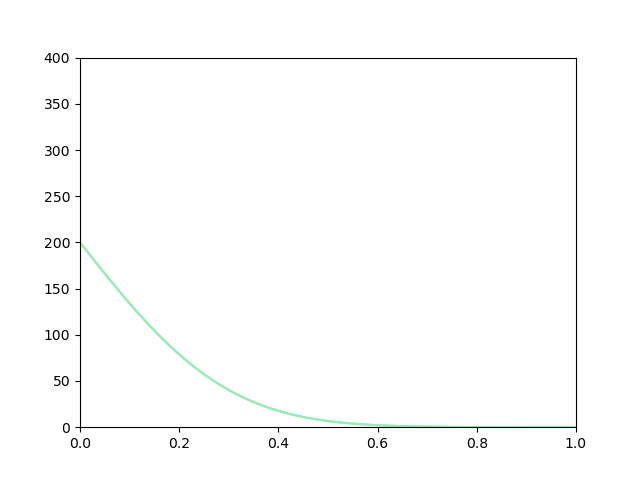

[0.         0.08333333 0.08391608 0.08392019 0.08392022 0.08392022
 0.08392022 0.08392022 0.08392022 0.08392022 0.08392022 0.08392022
 0.08392022 0.08392022 0.08392022 0.08392022 0.08392022 0.08392022
 0.08392022 0.08392022 0.08392022 0.08392022 0.08392022 0.08392022
 0.08392022 0.08392022 0.08392022 0.08392022 0.08392022 0.08392022
 0.08392022 0.08392022 0.08392022 0.08392022 0.08392022 0.08392022
 0.08392022 0.08392022 0.08392022 0.08392022 0.08392022 0.08392022
 0.08392022 0.08392022 0.08392022 0.08392022 0.08392022 0.08392022
 0.08392022 0.08392022 0.08392022 0.08392022 0.08392022 0.08392022
 0.08392022 0.08392022 0.08392022 0.08392022 0.08392022 0.08392022
 0.08392022 0.08392022 0.08392022 0.08392022 0.08392022 0.08392022
 0.08392022 0.08392022 0.08392022 0.08392022 0.08392022 0.08392022
 0.08392022 0.08392022 0.08392022 0.08392022 0.08392022 0.08392022
 0.08392022 0.08392022 0.08392022 0.08392022 0.08392022 0.08392022
 0.08392022 0.08392022 0.08392022 0.08392022 0.08392022 0.0839

In [89]:
#схема 2 трехступенчатая для линейного уравнения прогонкой
lambd = 0.1
Temp=200
L = 1
T = 1
C_p = 0.1
m = 100
h = L / m
t = C_p * h ** 2 / lambd
n = int(T // t)
x_i = np.arange(0, L+h, h) # значения в узлах по х
t_j = np.linspace(0, T, n) # значение в узлах по t
r_j = len(t_j) # количество узлов по t
r_i = len(x_i) # количество узлов по x
g_t_h = np.zeros([r_j, r_i]) # итоговая сетка размером t_j*x_i, просто температура, t
g1_t_h = np.zeros([r_j, r_i]) # т с волной t
g2_t_h = np.zeros([r_j, r_i]) # т с чертой t / 2
g3_t_h = np.zeros([r_j, r_i]) # т с крышкой t / 2
def fi(x, Temp):
    ans = np.zeros(len(x))
    for i in range(len(x)):
        if x[i] == 0:
            ans[i] = Temp
        else: 
            ans[i] = 0.1
    return(ans)
T_t_0 = fi(x_i, Temp) # значение при t = 0
T_x_0 = Temp # значение при x = 0
T_x_L = 0
g_t_h[0] = T_t_0 # инициализация сетки t = 0
g1_t_h[0] = T_t_0 # инициализация сетки t = 0
g2_t_h[0] = T_t_0 # инициализация сетки t = 0
g3_t_h[0] = T_t_0 # инициализация сетки t = 0
for i in range(n):
    g_t_h[i][0] = T_x_0 # граничное условие при х =0
print(g_t_h)
alph1 = np.zeros([r_i-1])
beta1 = np.zeros([r_i-1])

for j in range(r_j-1):
    alph1[0] = 0
    beta1[0] = g_t_h[j+1][0]
    for i in range(1, r_i-1): #вычисляем коэффициенты альфа и бета для g1
        alph1[i] = C_p / (-C_p* alph1[i - 1] + 1 + 2 * C_p)
        beta1[i] = (g_t_h[j][i] + C_p * beta1[i-1]) / (-C_p * alph1[i-1] + 1 + 2 * C_p)
    
    g_t_h[j+1][r_i-1] = (g_t_h[j+1][r_i-1] +C_p * beta1[r_i-2]) / (1 + 2 * C_p - C_p * alph1[r_i-2])
    for m in range(r_i - 3, -1, -1):#вычисляем прогонкой g1_t_h для шага по времени
        g_t_h[j+1][m] = g_t_h[j+1][m + 1] * alph1[m] + beta1[m]

fig = plt.figure()
ax = plt.axes(xlim=(0, 1), ylim=(0, 400))
line = []
N = 2
for j in range(N):
    temp, = plt.plot([], [])
    line.append(temp)
line = tuple(line)
def init():
    for j in range(N):
        line[j].set_data([], [])
    return line,
def animate(i):
    #x_i = np.arange(0, L, h)
    #y = g_t_h[i]
    x_i = np.arange(0, L+h, h)
    y1 = g_t_h[i]
    ksi = x_i / (2 * np.sqrt(lambd * i * t))
    y2 = Temp * special.erfc(ksi)
    line[0].set_data(x_i, y1)
    line[1].set_data(x_i, y2)
    return line,
 
anim = FuncAnimation(fig, animate, init_func=init,
                               frames=25000, interval=1, blit=True, repeat = False)
print(alph1)
print(alph1.shape)
print(beta1)